# Decision Tree with GradientBoosting and Experimentation

# Wisconsin Breast Cancer Diagnosis
 
## Benign or Malignant 

## Import packages and libraries 

In [64]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import graphviz
from sklearn import tree
from matplotlib.pylab import rcParams
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 6





In [65]:
data = pd.read_csv("wisconsin_breast_cancer_diagnosis.csv")

In [66]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [68]:
from sklearn.svm import SVC

X = data.iloc[:,2:32]  
y = data.iloc[:,1]
y.replace(['B', 'M'], [0, 1], inplace=True)

In [69]:
data = data.iloc[:,1:32]
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [85]:
#normalize
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)    
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)


In [86]:
labels = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [87]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive


def plot_tree(crit, split, depth , min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 100 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    print("Controlled Decision Tree : Change the above parameters and observe the difference.","\n","To see the effect of pruning, change the tree depth and notice the change in various metrics")
    print("\n")
    print("Accuracy on training set: {:.3f}".format(estimator.score(X_train, y_train)*100))
    print("Accuracy on test set: {:.3f}".format(estimator.score(X_test, y_test)*100))
    print("\n Confusion Matrix: \n")
    print(confusion_matrix(y_test, predictions))
    print("\n Classification Report: \n")
    print(classification_report(y_test, predictions))
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=labels, rounded = True, impurity = True
      , class_names=['B', 'M']
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
   , min_split=(2)
   , min_leaf=5)
display(inter)     

### Learning curves

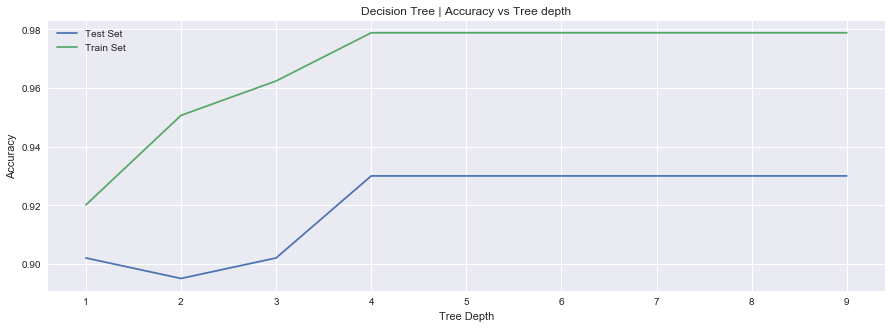

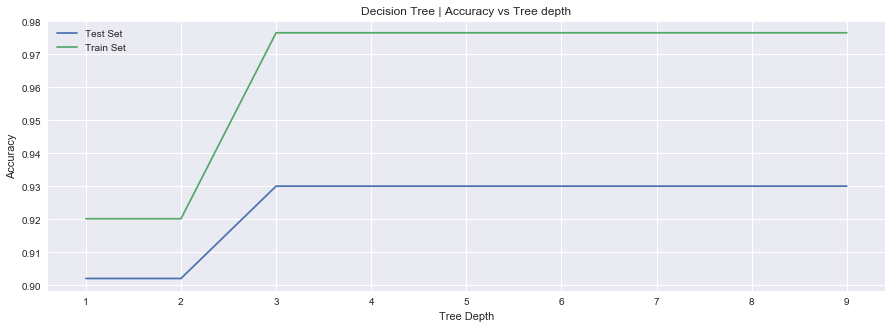

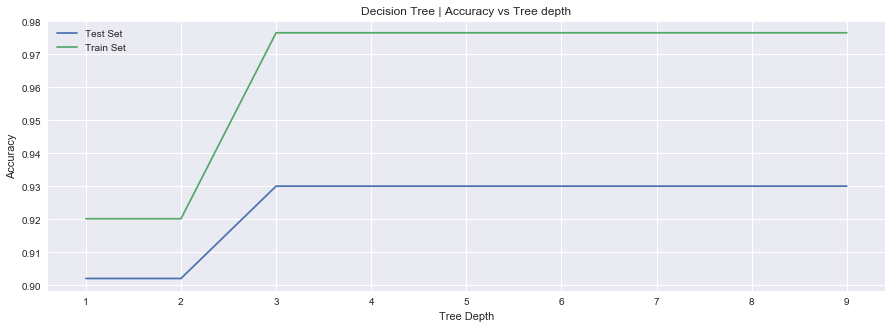

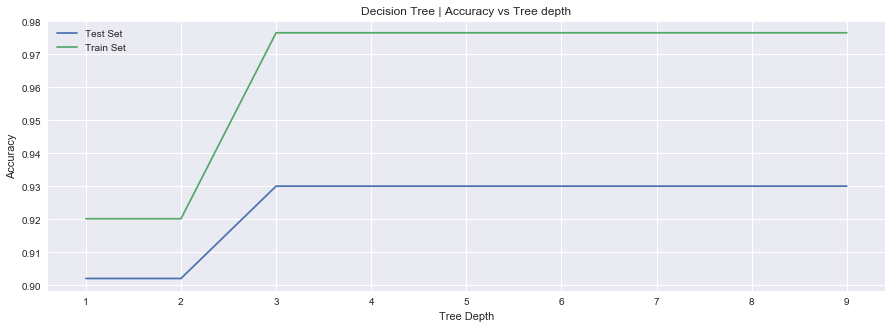

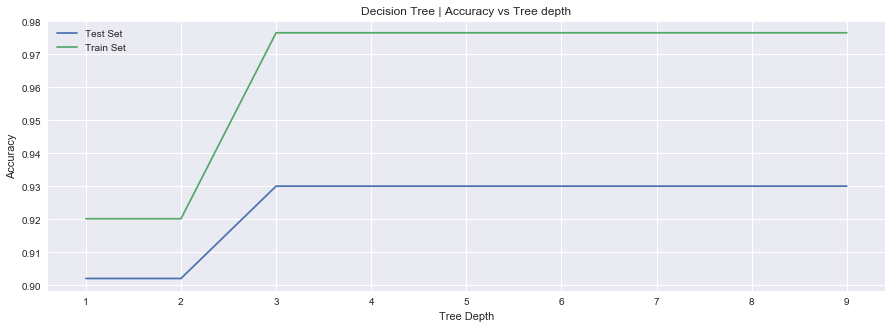

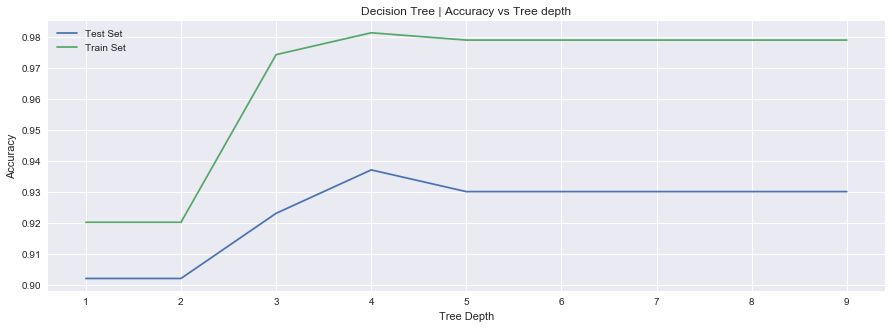

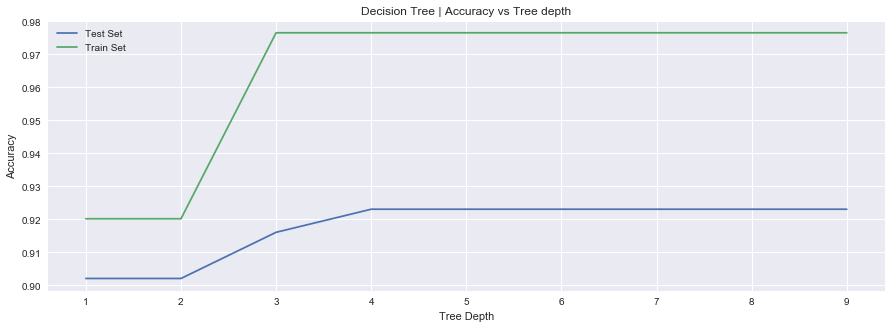

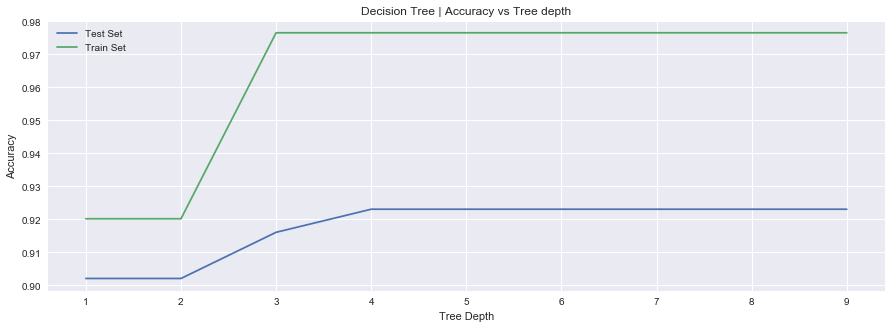

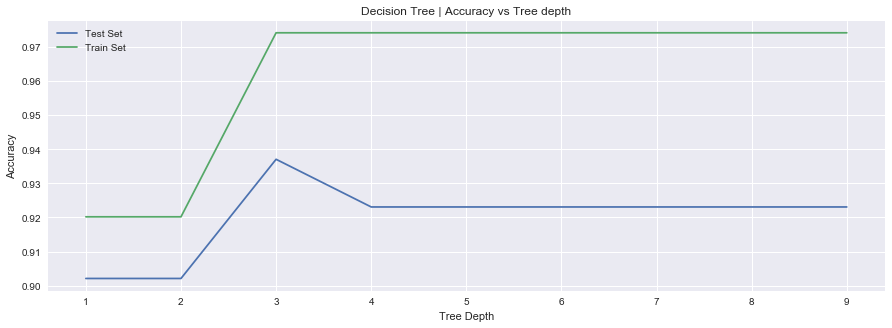

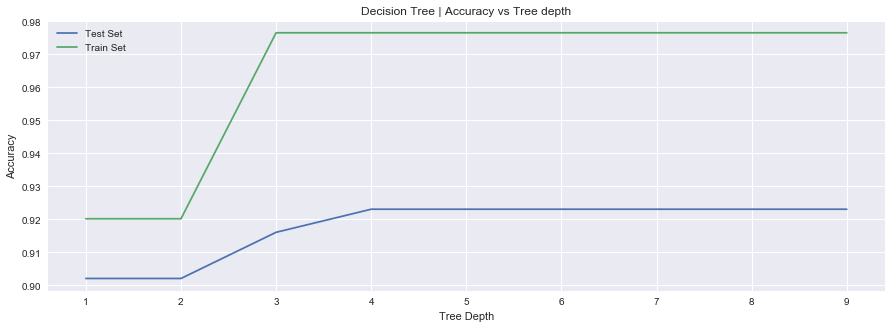

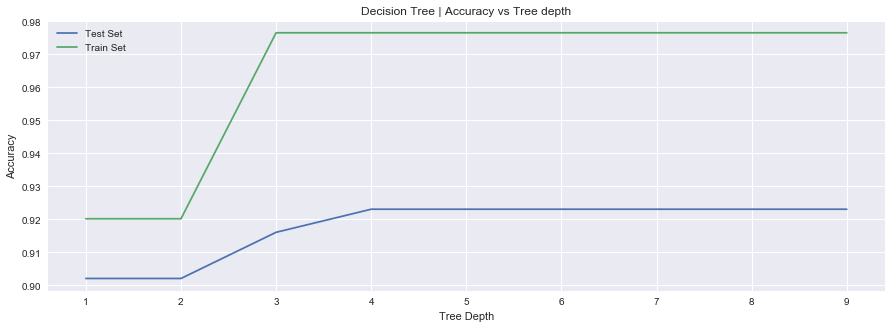

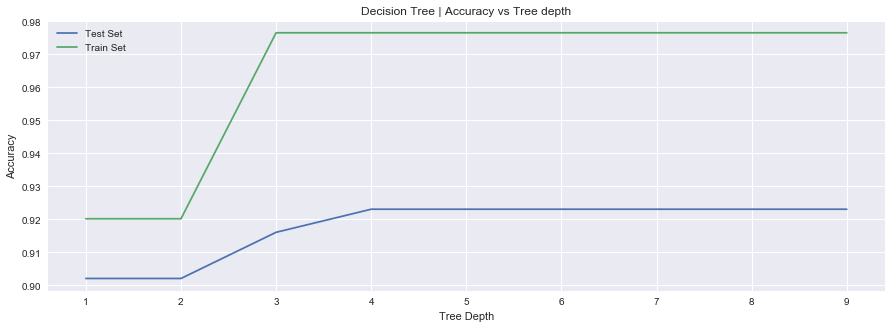

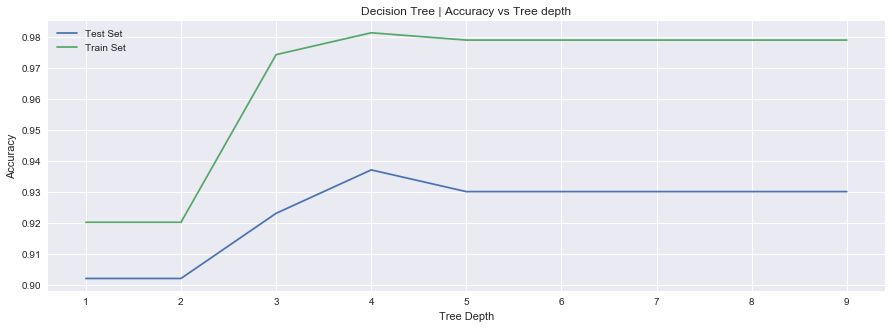

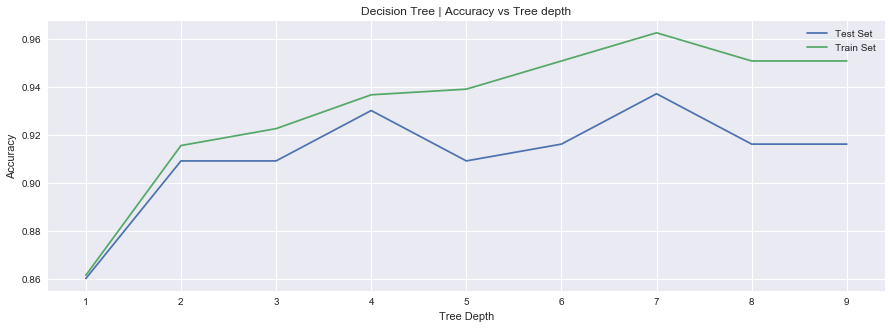

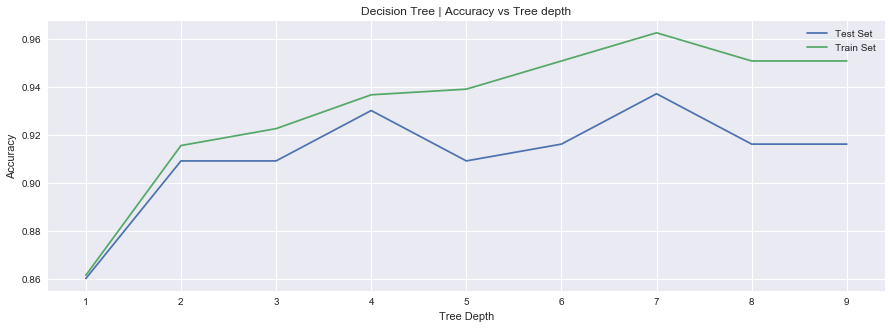

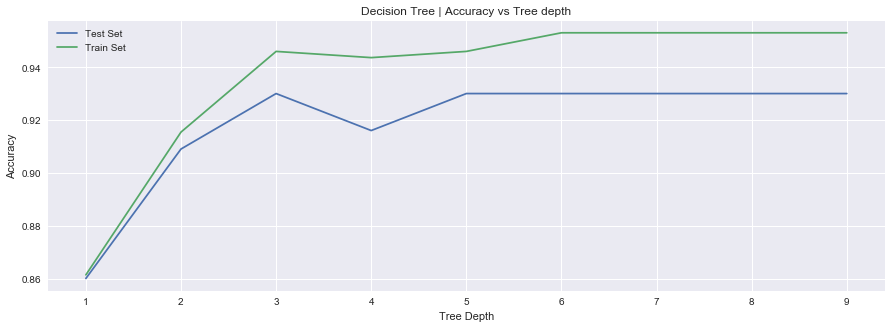

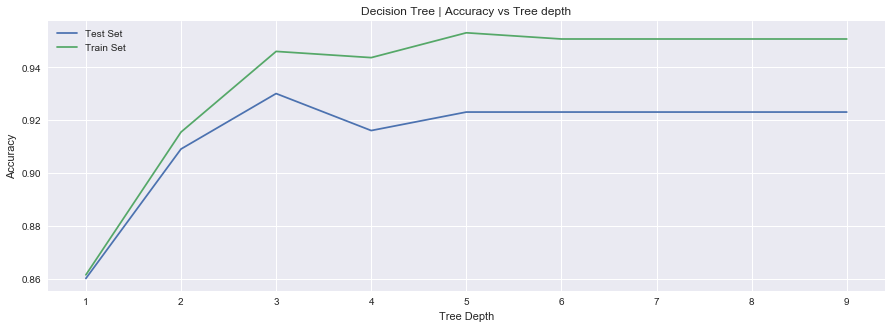

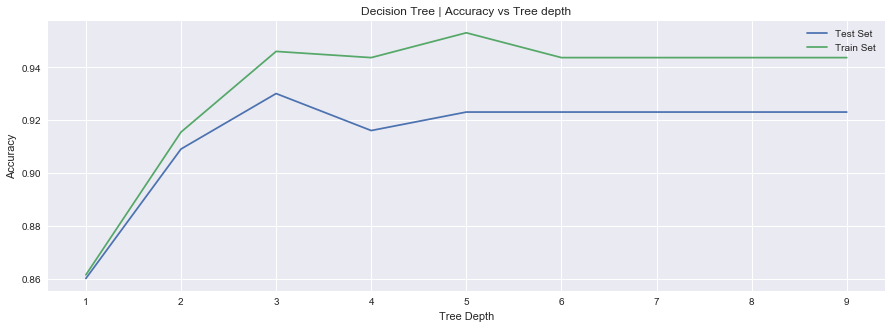

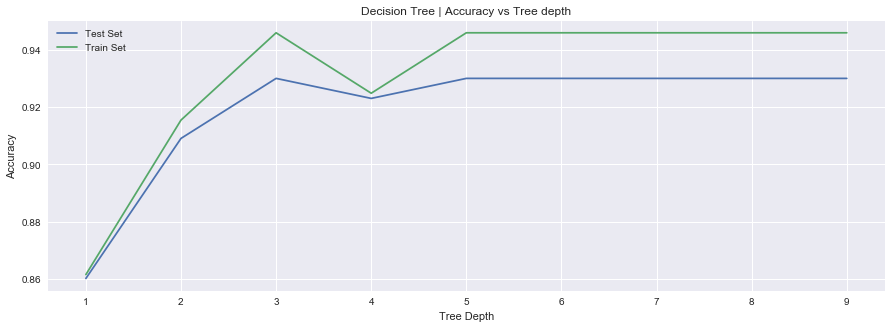

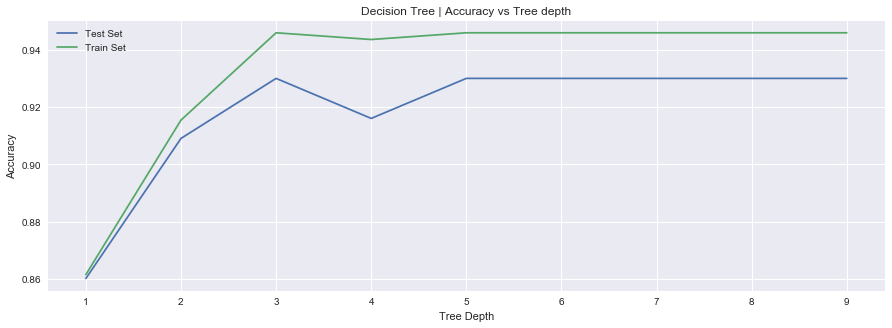

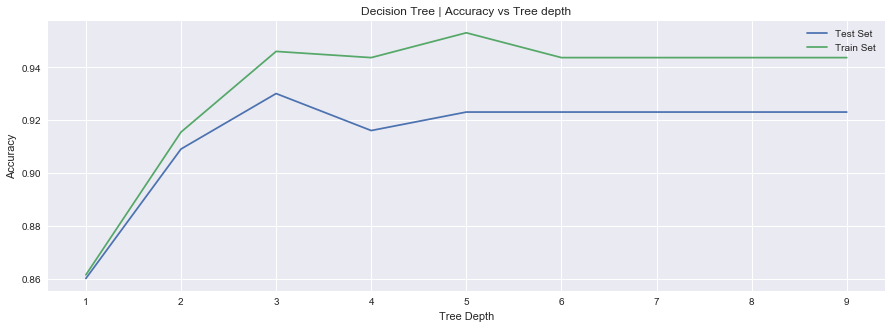

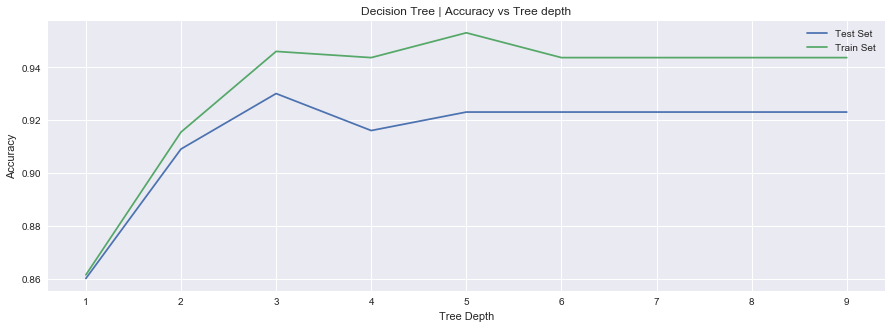

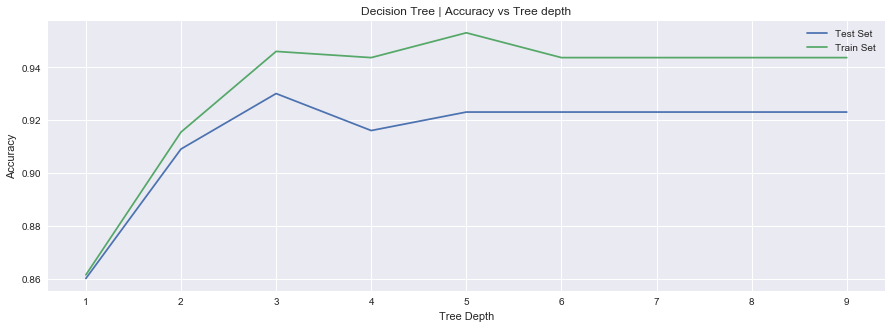

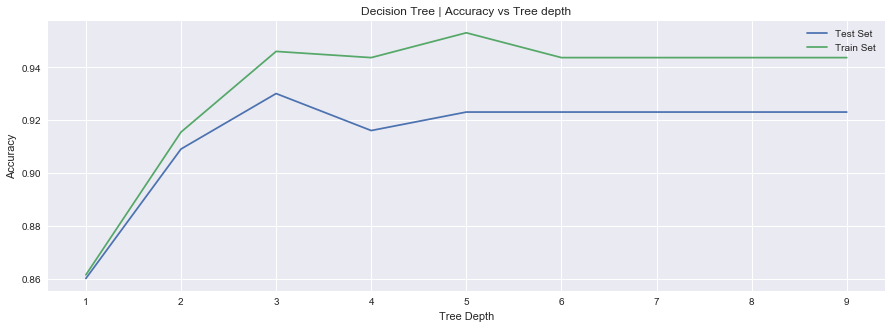

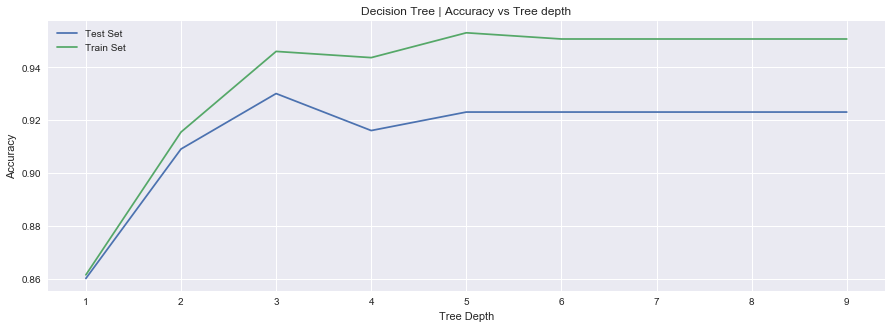

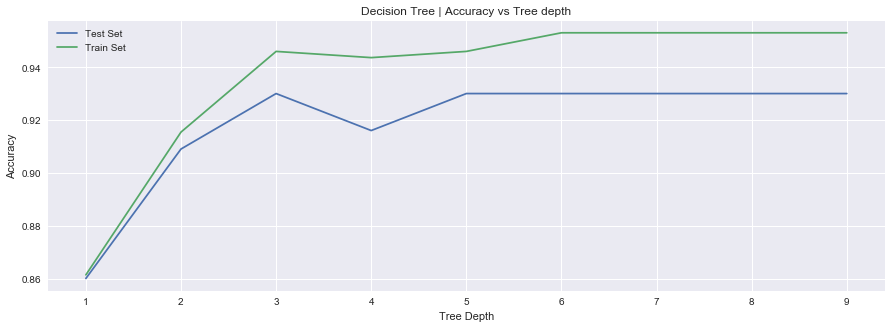

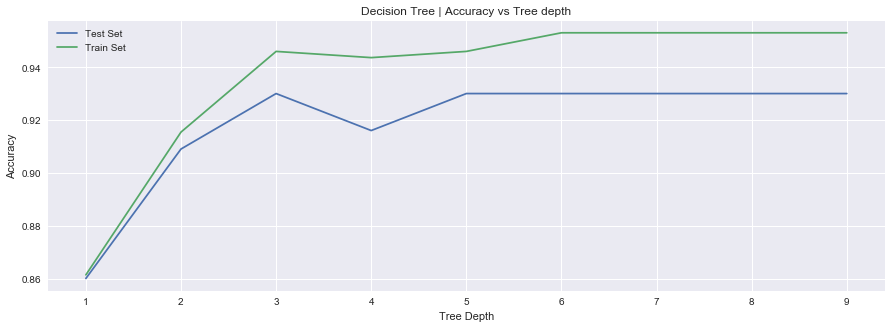

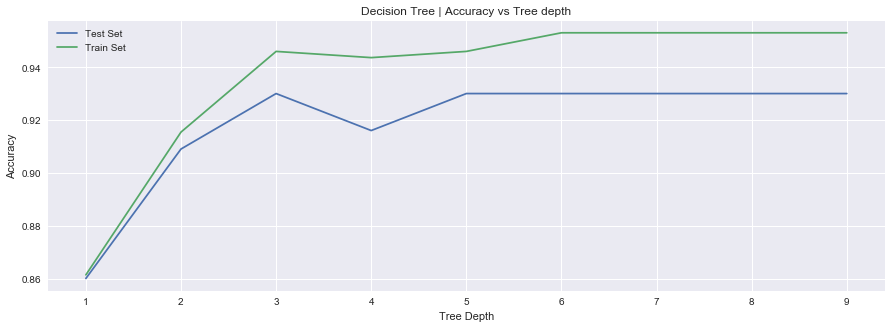

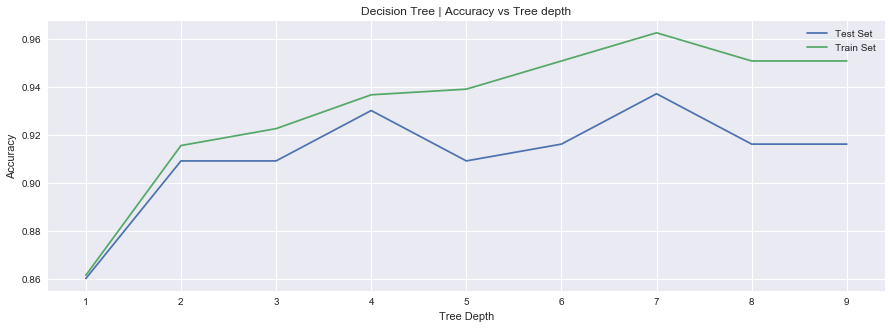

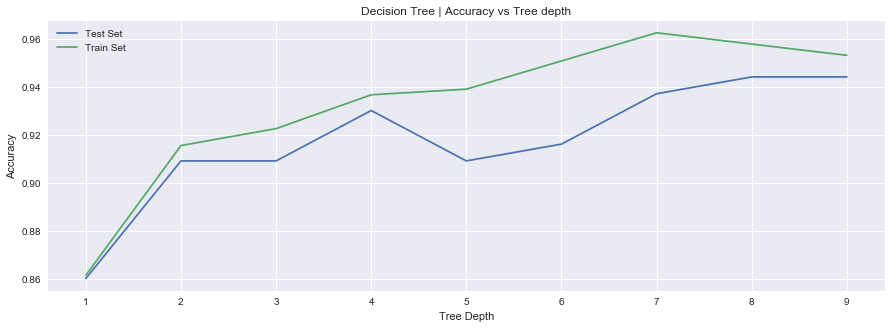

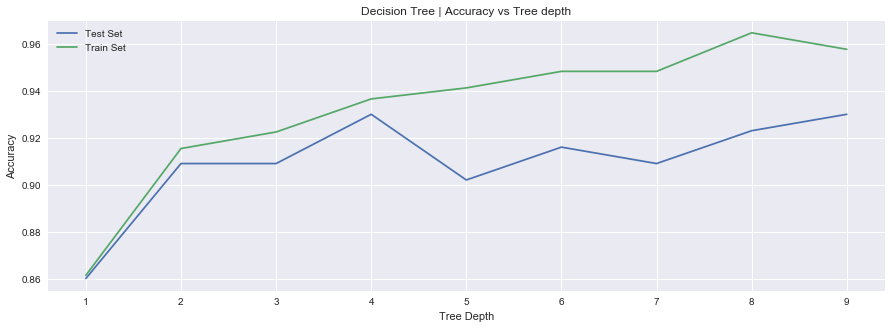

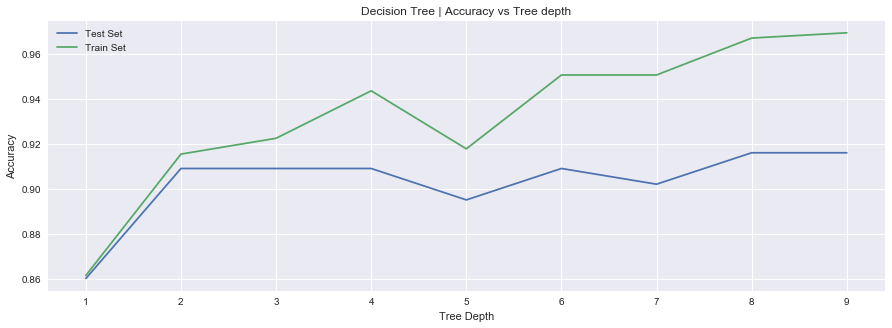

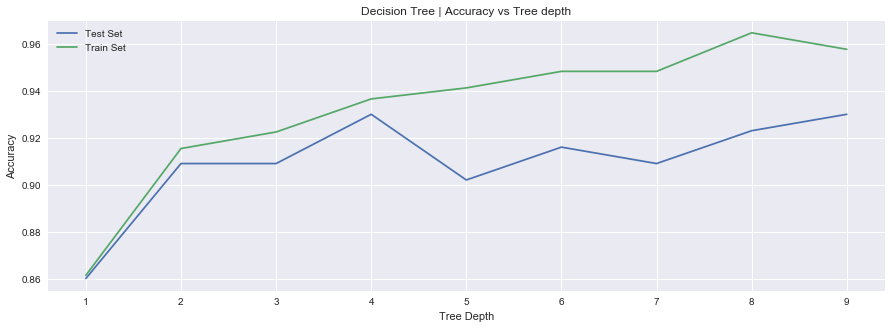

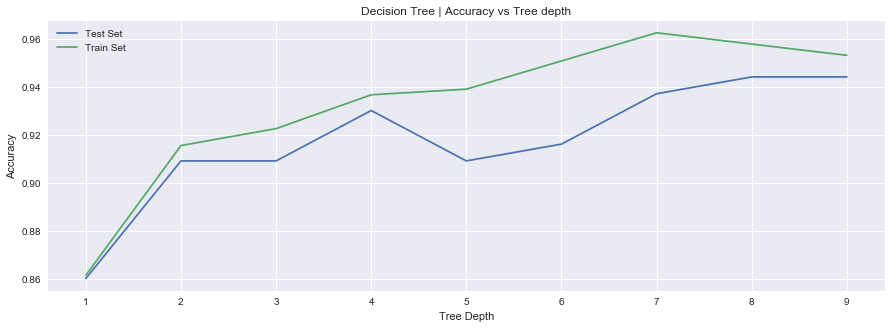

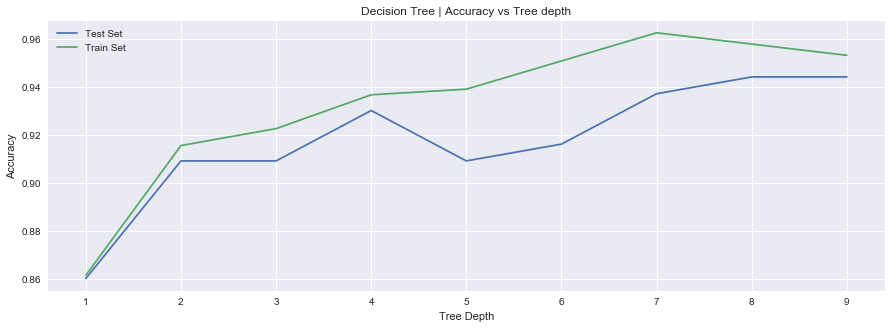

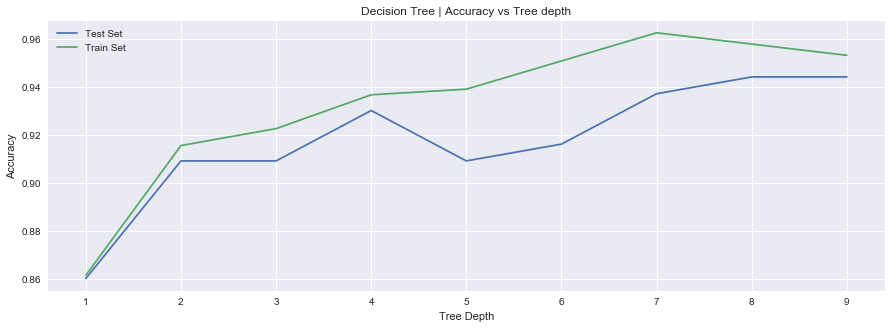

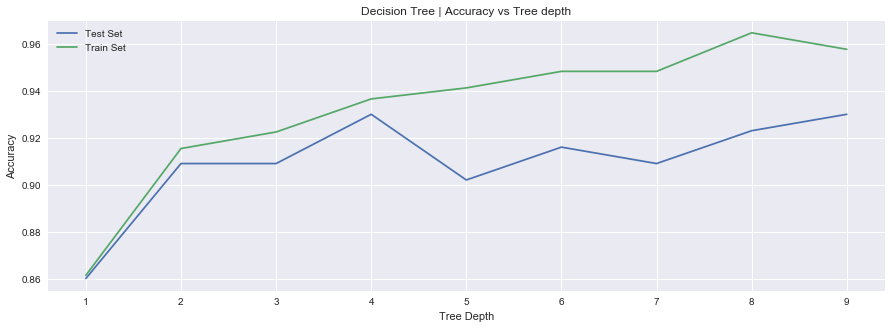

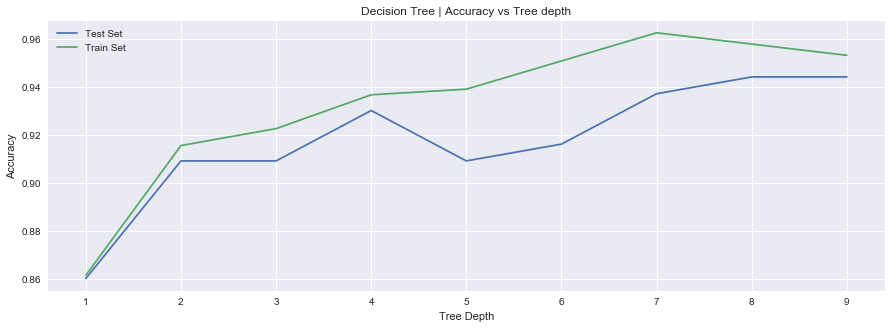

In [81]:
def learning_curve(crit, split, min_split, min_leaf=0.2):
    accuracy_test=[None]*10
    accuracy_train=[None]*10
    count=1
    for max_depth in range(1,10):
        estimator = DecisionTreeClassifier(random_state = 100 
        , criterion = crit
        , splitter = split
        , max_depth = max_depth                                   
        , min_samples_split=min_split
        , min_samples_leaf=min_leaf)
        estimator.fit(X_train, y_train)
        accuracy_train[count]=estimator.score(X_train, y_train)
        accuracy_test[count]=estimator.score(X_test, y_test)
        count+=1
    ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    ax1.plot(range(0,10),accuracy_test)
    ax1.plot(range(0,10),accuracy_train)
    plt.title("Decision Tree | Accuracy vs Tree depth")
    plt.xlabel("Tree Depth")
    plt.ylabel("Accuracy")
    plt.legend(['Test Set','Train Set'])   
    

inter=interactive(learning_curve 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , min_split=(2)
   , min_leaf=5)
display(inter)                              


    
    

In [82]:
y = data.iloc[:,0]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Gradient Boosting Classifier

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='exponential', max_depth=15,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='exponential', max_depth=15,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=100,
              subsample=0.5, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=100,
              subsample=0.5, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

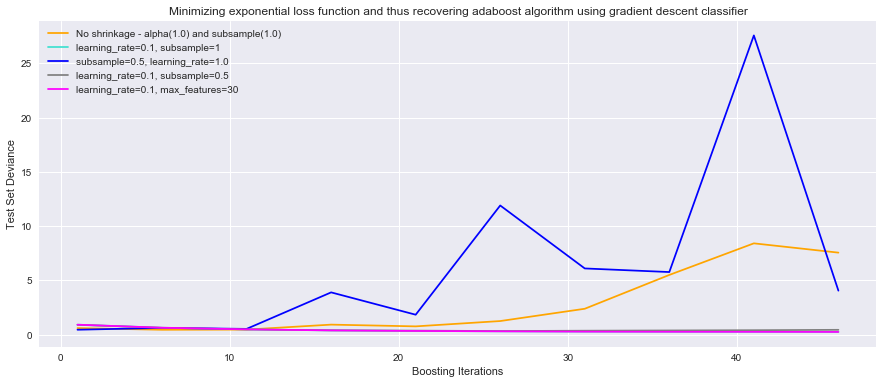

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble




X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)                           
                           
original_params1 = {'n_estimators':50,
                  'max_leaf_nodes': 4, 'max_depth':15, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential'}
#the accuracy doesnot change after increasing the max_depth greater than 2
plt.figure()

for label, color, setting in [('No shrinkage - alpha(1.0) and subsample(1.0)', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1, subsample=1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5, learning_rate=1.0', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=30', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 30})]:
    params = dict(original_params1)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')
plt.title("Minimizing exponential loss function and thus recovering adaboost algorithm using gradient descent classifier")
plt.show()

**Here in the graph above we can see various trends when regulated sub sample(0.5 or 1.0), learning rate( 0.1 or 1.0) and maximum no. of features**

In [99]:

params = dict(original_params1)
params.update(setting)

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Acuracy on training set: {:.3f}".format(clf.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(clf.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

Acuracy on training set: 99.531
Acuracy on test set: 95.105

 Confusion Matrix: 

[[85  2]
 [ 5 51]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.94      0.98      0.96        87
          1       0.96      0.91      0.94        56

avg / total       0.95      0.95      0.95       143



In [108]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0


for max_depth in range(1,16):
    original_params1 = {'n_estimators':22,
                  'max_leaf_nodes': 4, 'max_depth':max_depth, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential'}
    params = dict(original_params1)
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy_train[count]=clf.score(X_train, y_train)
    accuracy_test[count]=clf.score(X_test, y_test)
    count+=1

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=1,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=5,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=6,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=7,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=8,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=9,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=11,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=12,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=13,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=14,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

[0.9812206572769953,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221]

[0.951048951048951,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441,
 0.9440559440559441]

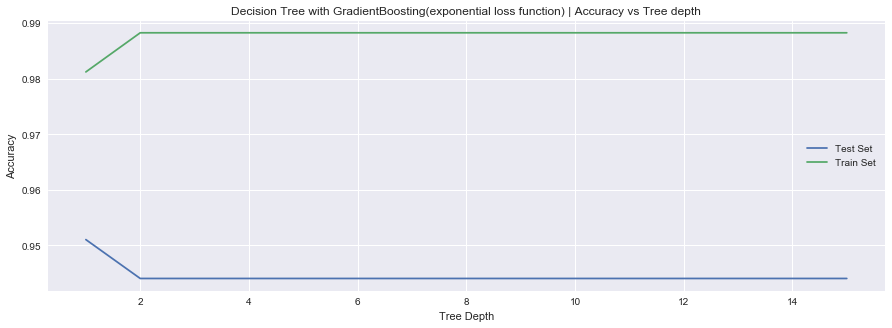

In [109]:
accuracy_train
accuracy_test
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree with GradientBoosting(exponential loss function) | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

**so we can see that the accuracy starts to depreciate after depth 1**

In [56]:
accuracy_test=[None]*200
accuracy_train=[None]*200
count=0


for n_estimators in range(1,201):
    original_params1 = {'n_estimators':n_estimators,
                  'max_leaf_nodes': 4, 'max_depth':10, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential'}
    params = dict(original_params1)
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy_train[count]=clf.score(X_train, y_train)
    accuracy_test[count]=clf.score(X_test, y_test)
    count+=1

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=1, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=2, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=4, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=6, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=9, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=11,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=12,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=13,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=14,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=15,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=16,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=17,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=18,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=19,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=21,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=23,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=24,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=26,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=27,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=28,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=29,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=31,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=32,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=33,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=34,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=35,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=36,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=37,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=38,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=39,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=41,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=42,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=43,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=44,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=45,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=46,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=47,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=48,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=49,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=52,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=53,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=54,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=55,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=56,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=57,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=58,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=59,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=61,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=62,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=63,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=64,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=65,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=66,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=67,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=68,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=69,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=71,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=72,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=73,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=74,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=75,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=76,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=77,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=78,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=79,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=81,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=82,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=83,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=84,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=85,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=86,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=87,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=88,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=89,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=91,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=92,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=93,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=94,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=95,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=96,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=97,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=98,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=99,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=101,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=102,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=103,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=104,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=106,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=107,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=108,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=109,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=110,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=111,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=112,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=113,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=114,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=115,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=116,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=117,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=118,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=119,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=121,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=122,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=123,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=124,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=125,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=126,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=127,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=128,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=129,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=130,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=131,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=132,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=133,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=134,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=135,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=136,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=137,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=138,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=139,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=140,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=141,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=142,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=143,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=144,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=145,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=146,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=147,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=148,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=149,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=151,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=152,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=153,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=154,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=155,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=156,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=157,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=158,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=159,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=161,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=162,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=163,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=164,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=165,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=166,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=167,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=168,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=169,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=170,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=171,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=172,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=173,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=174,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=175,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=176,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=177,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=178,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=179,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=180,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=181,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=182,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=183,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=184,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=185,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=186,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=187,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=188,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=189,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=190,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=191,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=192,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=193,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=194,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=195,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=196,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=197,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=198,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=199,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

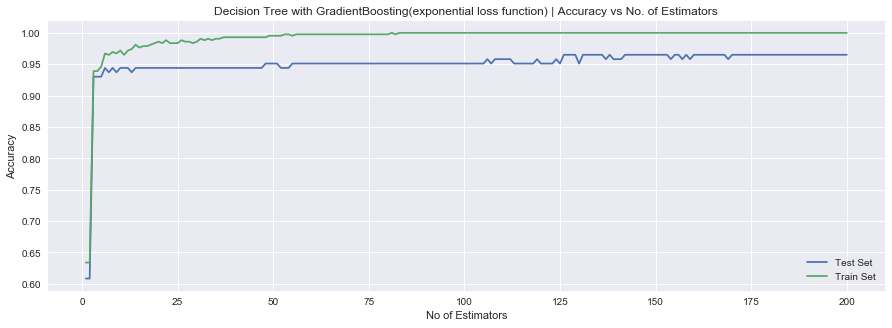

In [57]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,201),accuracy_test)
ax1.plot(range(1,201),accuracy_train)


plt.title("Decision Tree with GradientBoosting(exponential loss function) | Accuracy vs No. of Estimators")
plt.xlabel("No of Estimators")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

### At max tree depth = 1 and no. of estimators = 128 we get a better accuracy on both test and train set
### At max tree depth = 10 and no. of estimators = 128 also we get better accuracy
### At max tree depth = 15 and no. of estimators = 128 we get better fit and accuracy

** This implies optimum no. of estimators = 128 and max_tree depth = 1, we haven't tuned the alpha parameter yet. Lets check the accuracy with default value alpha = 0.1 and other newly found optimum parameters**

In [110]:
original_params1 = {'n_estimators': 128,
                  'max_leaf_nodes': 4, 'max_depth':1, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential'}
params = dict(original_params1)
params.update(setting)

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Acuracy on training set: {:.3f}".format(clf.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(clf.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=1,
              max_features=30, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=128,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

Acuracy on training set: 100.000
Acuracy on test set: 95.804

 Confusion Matrix: 

[[86  1]
 [ 5 51]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.95      0.99      0.97        87
          1       0.98      0.91      0.94        56

avg / total       0.96      0.96      0.96       143



## Tuning the alpha Parameter

### now lets see the change in convergence using tuning of alpha or learning_rate

In [112]:
accuracy_test=[None]*7
accuracy_train=[None]*7
count=0


for alpha in [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1]:
    original_params1 = {'n_estimators':128,
                  'max_leaf_nodes': 4, 'max_depth':1, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential','learning_rate': alpha}
    params = dict(original_params1)
    
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy_train[count]=clf.score(X_train, y_train)
    accuracy_test[count]=clf.score(X_test, y_test)
    count+=1


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='exponential', max_depth=1,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=128, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=1,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=128, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=1,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=128, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='exponential', max_depth=1,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=128, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='exponential', max_depth=1,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=128, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='exponential', max_depth=1,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=128, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='exponential', max_depth=1,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=128, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x1c23bc2a780>,
 <a list of 7 Text xticklabel objects>)

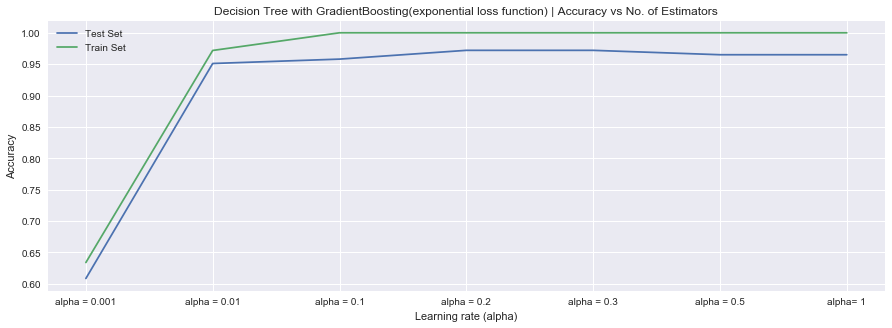

In [113]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,8),accuracy_test)
ax1.plot(range(1,8),accuracy_train)


plt.title("Decision Tree with GradientBoosting(exponential loss function) | Accuracy vs No. of Estimators")
plt.xlabel("Learning rate (alpha)")
plt.ylabel("Accuracy")
plt.xticks((1,2,3,4,5,6,7), ('alpha = 0.001', 'alpha = 0.01', 'alpha = 0.1', 'alpha = 0.2', 'alpha = 0.3','alpha = 0.5','alpha= 1'))
plt.legend(['Test Set','Train Set'])

### It looks as if at alpha  = 0.2, Accuracy is at the peak

In [118]:
optimum_params = {'n_estimators': 128,
                  'max_leaf_nodes': 4, 'max_depth':1, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential','learning_rate' : 0.2}
params = dict(optimum_params)


clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Acuracy on training set: {:.3f}".format(clf.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(clf.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='exponential', max_depth=1,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=128, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

Acuracy on training set: 100.000
Acuracy on test set: 97.203

 Confusion Matrix: 

[[87  0]
 [ 4 52]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        87
          1       1.00      0.93      0.96        56

avg / total       0.97      0.97      0.97       143

